In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import shap
import time
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.decomposition import  PCA
from sklearn.model_selection import  KFold
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#from imblearn.over_sampling import SMOTE
#from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score,confusion_matrix , classification_report,balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, recall_score,roc_auc_score,accuracy_score,precision_score



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
pd.set_option('display.max_rows',800)
pd.set_option('display.max_columns',900)
pd.options.display.max_colwidth  = 550

In [ ]:
path ="./data_csv/dataset_train_test/"
csv_train = 'data_train.csv'
csv_test = 'data_test.csv'
train = pd.read_csv(path + csv_train)
df_test= pd.read_csv(path + csv_test)
test = df_test.copy()
train.shape, df_test.shape

((246541, 194), (40076, 193))

In [ ]:
y_train = train['TARGET']
X_train = train.drop(columns = ['TARGET','SK_ID_CURR'])
y = y_train.copy()
X = X_train.copy()

**Traitement de fichier Train:**

*1-Messing_values:*

In [ ]:
(X.isna().sum()/X.shape[0]).sort_values(ascending = False)

CC_SK_DPD_DEF_MEAN                              0.713070
CC_AMT_DRAWINGS_CURRENT_MAX                     0.713070
CC_MONTHS_BALANCE_MAX                           0.713070
CC_MONTHS_BALANCE_MIN                           0.713070
CC_MONTHS_BALANCE_SIZE                          0.713070
CC_AMT_BALANCE_MIN                              0.713070
CC_AMT_BALANCE_MAX                              0.713070
CC_AMT_BALANCE_MEAN                             0.713070
CC_AMT_CREDIT_LIMIT_ACTUAL_MIN                  0.713070
CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN                 0.713070
CC_AMT_CREDIT_LIMIT_ACTUAL_SIZE                 0.713070
CC_AMT_DRAWINGS_ATM_CURRENT_MAX                 0.713070
CC_AMT_DRAWINGS_ATM_CURRENT_SUM                 0.713070
CC_AMT_CREDIT_LIMIT_ACTUAL_MAX                  0.713070
CC_AMT_DRAWINGS_CURRENT_SUM                     0.713070
CC_CNT_DRAWINGS_CURRENT_MIN                     0.713070
CC_AMT_DRAWINGS_OTHER_CURRENT_MAX               0.713070
CC_SK_DPD_MEAN                 

In [ ]:
# Je fixe un threshold a 0.60 et je supprime les colonne avec des données manquentes >a ce threshold:
threshold = 0.60
print(f"on a {X.shape} colonne dans le jeux d'entrainement\n")
messing_val = X.columns[(X.isna().sum() / X.shape[0] > threshold)]
print(F"ON A {len(messing_val)} colonne avec des données manquantes supérieur ou égal à 60%\n")
X.drop(columns = messing_val, axis = 1, inplace = True)
print(f"Apres la suppression le shape de X_train =  {X.shape} colonne")

on a (246541, 192) colonne dans le jeux d'entrainement

ON A 29 colonne avec des données manquantes supérieur ou égal à 60%

Apres la suppression le shape de X_train =  (246541, 163) colonne


*2-La distribution des données apreés l'imputation par mean et median:*

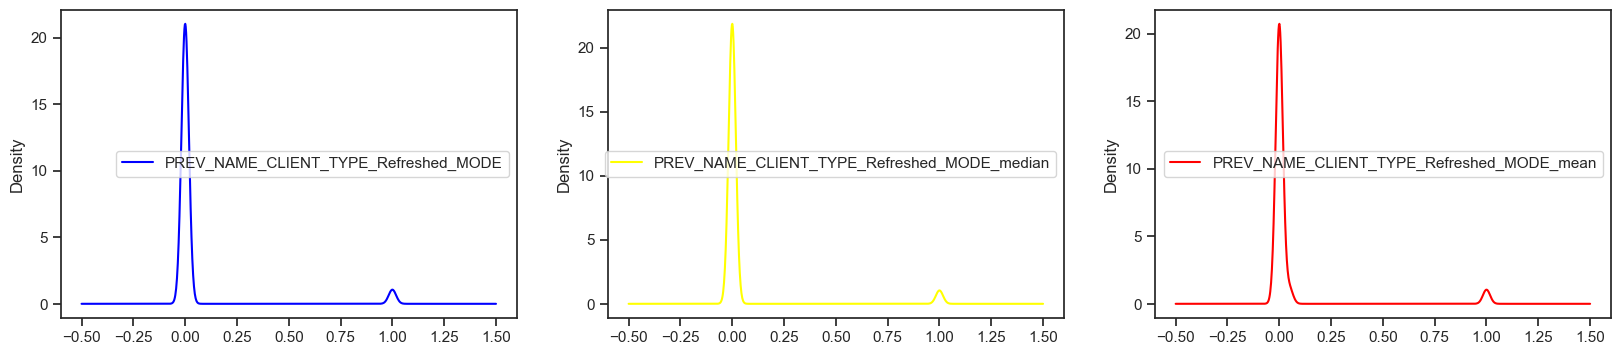

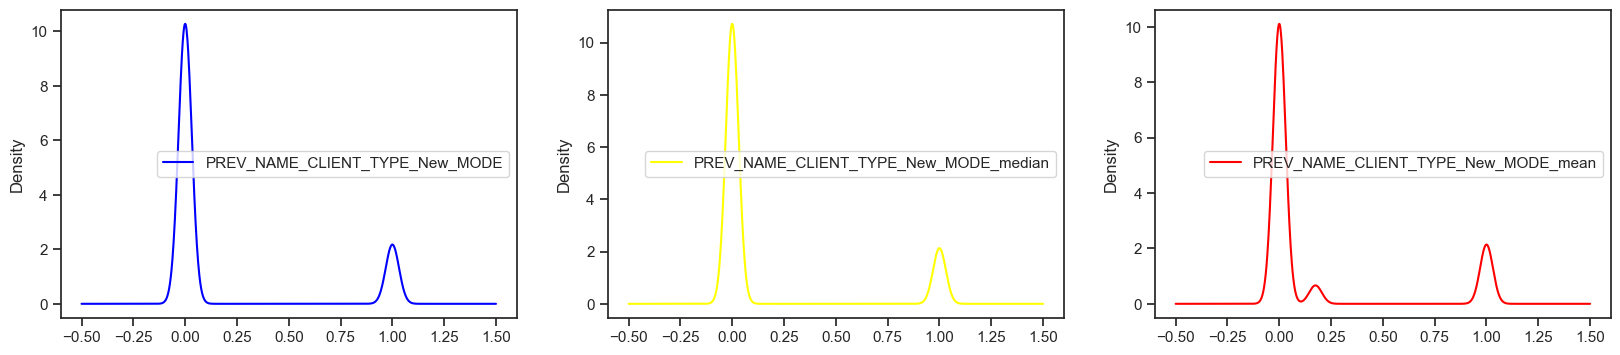

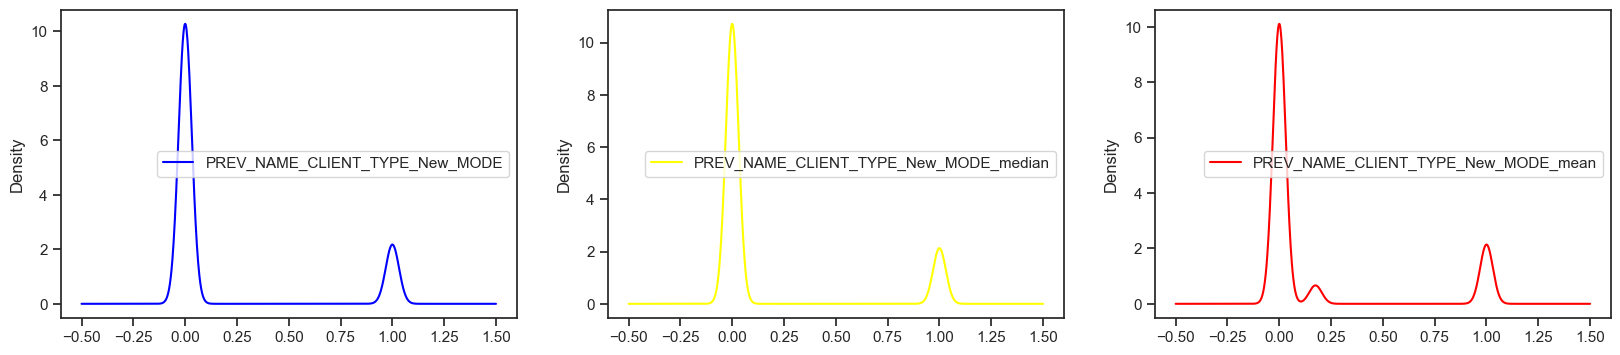

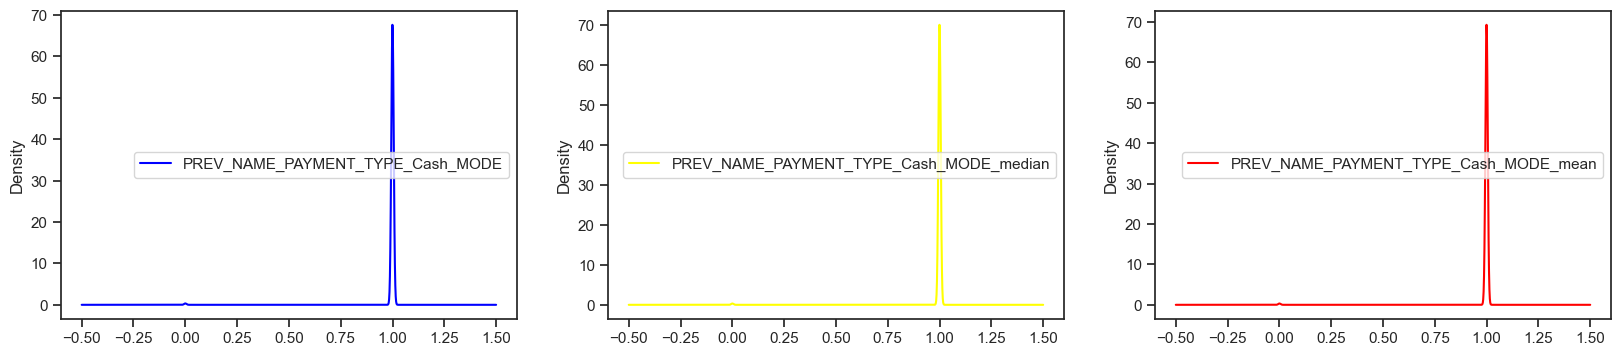

In [ ]:
# # visualisation la distributio apres les impultatio n par le mean et mediane 

# impultation par median
X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE_median'] = X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE'].fillna(X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE'].median())
# impulation par mean
X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE_mean'] = X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE'].fillna(X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE'].mean())

sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})
# visualisation
plt.subplot(1, 3, 1)
X["PREV_NAME_CLIENT_TYPE_Refreshed_MODE"].plot(kind='kde',color='blue')
plt.legend()
plt.subplot(1, 3, 2)
X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE_median'].plot(kind='kde',color='yellow')
plt.legend()
plt.subplot(1, 3, 3)
X['PREV_NAME_CLIENT_TYPE_Refreshed_MODE_mean'].plot(kind='kde',color='red')
plt.legend()
plt.show()

##--------------------------------------------------------

X['PREV_NAME_CLIENT_TYPE_New_MODE_median'] = X['PREV_NAME_CLIENT_TYPE_New_MODE'].fillna(X['PREV_NAME_CLIENT_TYPE_New_MODE'].median())
# impulation par mean
X['PREV_NAME_CLIENT_TYPE_New_MODE_mean'] = X['PREV_NAME_CLIENT_TYPE_New_MODE'].fillna(X['PREV_NAME_CLIENT_TYPE_New_MODE'].mean())

sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})
# visualisation
plt.subplot(1, 3, 1)
X["PREV_NAME_CLIENT_TYPE_New_MODE"].plot(kind='kde',color='blue')
plt.legend()
plt.subplot(1, 3, 2)
X['PREV_NAME_CLIENT_TYPE_New_MODE_median'].plot(kind='kde',color='yellow')
plt.legend()
plt.subplot(1, 3, 3)
X['PREV_NAME_CLIENT_TYPE_New_MODE_mean'].plot(kind='kde',color='red')
plt.legend()
plt.show()

##-------------------------------------------------------------

X['PREV_NAME_CLIENT_TYPE_New_MODE_median'] = X['PREV_NAME_CLIENT_TYPE_New_MODE'].fillna(X['PREV_NAME_CLIENT_TYPE_New_MODE'].median())
# impulation par mean
X['PREV_NAME_CLIENT_TYPE_New_MODE_mean'] = X['PREV_NAME_CLIENT_TYPE_New_MODE'].fillna(X['PREV_NAME_CLIENT_TYPE_New_MODE'].mean())

sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})
# visualisation
plt.subplot(1, 3, 1)
X["PREV_NAME_CLIENT_TYPE_New_MODE"].plot(kind='kde',color='blue')
plt.legend()
plt.subplot(1, 3, 2)
X['PREV_NAME_CLIENT_TYPE_New_MODE_median'].plot(kind='kde',color='yellow')
plt.legend()
plt.subplot(1, 3, 3)
X['PREV_NAME_CLIENT_TYPE_New_MODE_mean'].plot(kind='kde',color='red')
plt.legend()
plt.show()
#------------------------------------------------------------------

X['PREV_NAME_PAYMENT_TYPE_Cash_MODE_median'] = X['PREV_NAME_PAYMENT_TYPE_Cash_MODE'].fillna(X['PREV_NAME_PAYMENT_TYPE_Cash_MODE'].median())
# impulation par mean
X['PREV_NAME_PAYMENT_TYPE_Cash_MODE_mean'] = X['PREV_NAME_PAYMENT_TYPE_Cash_MODE'].fillna(X['PREV_NAME_PAYMENT_TYPE_Cash_MODE'].mean())

sns.set(style="ticks", rc = {'figure.figsize':(20, 4)})
# visualisation
plt.subplot(1, 3, 1)
X["PREV_NAME_PAYMENT_TYPE_Cash_MODE"].plot(kind='kde',color='blue')
plt.legend()
plt.subplot(1, 3, 2)
X['PREV_NAME_PAYMENT_TYPE_Cash_MODE_median'].plot(kind='kde',color='yellow')
plt.legend()
plt.subplot(1, 3, 3)
X['PREV_NAME_PAYMENT_TYPE_Cash_MODE_mean'].plot(kind='kde',color='red')
plt.legend()
plt.show()
#----------------------------------------------------------


In [ ]:
# Suppression des colonnes qui cha,ge de distribution apres l'essaies d'imputation :
col_to_drop = ['POS_MONTHS_BALANCE_MIN','POS_MONTHS_BALANCE_MAX','POS_SK_DPD_MEAN','POS_SK_DPD_MAX','POS_SK_DPD_DEF_MAX','POS_CNT_INSTALMENT_MEAN',
               'POS_NAME_CONTRACT_STATUS_MODE',"PREV_NAME_CONTRACT_STATUS_MODE",'PREV_WEEKDAY_APPR_PROCESS_START_MODE',
                'PREV_SELLERPLACE_AREA_MEAN','PREV_DAYS_DECISION_MAX','PREV_DAYS_DECISION_MIN','PREV_DAYS_DECISION_MEAN','PREV_HOUR_APPR_PROCESS_START_MEAN',
                'INSTA_DAYS_ENTRY_PAYMENT_MIN','INSTA_AMT_INSTALMENT_MAX','INSTA_NEW_DBD_MEAN','INSTA_NUM_INSTALMENT_NUMBER_COUNT',
                'INSTA_NUM_INSTALMENT_NUMBER_MEAN','PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MODE','PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MODE',
                'PREV_NAME_CONTRACT_TYPE_Consumer loans_MODE']
X.drop(columns = col_to_drop,axis = 1,inplace = True)               


In [ ]:
# imputation des colonnes avec mean dan sle fichier train:
impute_with_mean = ['INSTA_DAYS_ENTRY_PAYMENT_MEAN','INSTA_NEW_DPD_MAX','INSTA_NEW_DBD_MAX','BURO_CREDIT_ACTIVE_MODE','BURO_CREDIT_TYPE_MODE','POS_CNT_INSTALMENT_MAX',
                    'POS_CNT_INSTALMENT_MIN','PREV_NAME_CONTRACT_TYPE_Revolving loans_MODE']

X[impute_with_mean] = X[impute_with_mean].fillna(X[impute_with_mean].mean())

In [ ]:
# Imputation des colonnes avec median dans le fichier train:
columns_with_missing_values = X.columns[X.isna().any()].tolist()
X[columns_with_missing_values] = X[columns_with_missing_values].fillna(X[columns_with_missing_values].median())

In [ ]:
X.shape

(246541, 141)

**2-Traitement pour le fichier Test:**

In [ ]:
test.shape

(40076, 193)

In [ ]:
threshold = 0.60
print(f"on a {test.shape} colonne dans le jeux de test \n")
messing_val = test.columns[(test.isna().sum() / test.shape[0] > threshold)]
print(F"ON A {len(messing_val)} colonne avec des données manquantes supérieur ou égal à 60%\n")
test.drop(columns = messing_val, axis = 1, inplace = True)
print(f"Apres la suppression le shape de test =  {test.shape} colonne")

on a (40076, 193) colonne dans le jeux de test 

ON A 26 colonne avec des données manquantes supérieur ou égal à 60%

Apres la suppression le shape de test =  (40076, 167) colonne


In [ ]:
col_to_drop = ['POS_MONTHS_BALANCE_MIN','POS_MONTHS_BALANCE_MAX','POS_SK_DPD_MEAN','POS_SK_DPD_MAX','POS_SK_DPD_DEF_MAX','POS_CNT_INSTALMENT_MEAN',
               'POS_NAME_CONTRACT_STATUS_MODE',"PREV_NAME_CONTRACT_STATUS_MODE",'PREV_WEEKDAY_APPR_PROCESS_START_MODE',
                'PREV_SELLERPLACE_AREA_MEAN','PREV_DAYS_DECISION_MAX','PREV_DAYS_DECISION_MIN','PREV_DAYS_DECISION_MEAN','PREV_HOUR_APPR_PROCESS_START_MEAN',
                'INSTA_DAYS_ENTRY_PAYMENT_MIN','INSTA_AMT_INSTALMENT_MAX','INSTA_NEW_DBD_MEAN','INSTA_NUM_INSTALMENT_NUMBER_COUNT',
                'INSTA_NUM_INSTALMENT_NUMBER_MEAN','PREV_FLAG_LAST_APPL_PER_CONTRACT_Y_MODE','PREV_FLAG_LAST_APPL_PER_CONTRACT_N_MODE',
                'PREV_NAME_CONTRACT_TYPE_Consumer loans_MODE']
test.drop(columns = col_to_drop,axis = 1,inplace = True)    
         


In [ ]:
impute_with_mean = ['INSTA_DAYS_ENTRY_PAYMENT_MEAN','INSTA_NEW_DPD_MAX','INSTA_NEW_DBD_MAX','BURO_CREDIT_ACTIVE_MODE','BURO_CREDIT_TYPE_MODE','POS_CNT_INSTALMENT_MAX',
                    'POS_CNT_INSTALMENT_MIN','PREV_NAME_CONTRACT_TYPE_Revolving loans_MODE']

test[impute_with_mean] = test[impute_with_mean].fillna(test[impute_with_mean].mean())

In [ ]:
columns_with_missing_values = test.columns[test.isna().any()].tolist()
test[columns_with_missing_values] = test[columns_with_missing_values].fillna(test[columns_with_missing_values].median())

In [ ]:
messing_values = (test.isna().sum()/test.shape[0]).sort_values(ascending = False)*100
messing_values

SK_ID_CURR                                      0.0
LIVE_CITY_NOT_WORK_CITY_Same                    0.0
FLAG_DOCUMENT_11_No                             0.0
FLAG_DOCUMENT_11_Yes                            0.0
FLAG_DOCUMENT_18_No                             0.0
FLAG_DOCUMENT_18_Yes                            0.0
BURO_DAYS_CREDIT_MIN                            0.0
BURO_DAYS_CREDIT_MAX                            0.0
BURO_DAYS_CREDIT_MEAN                           0.0
BURO_DAYS_CREDIT_SIZE                           0.0
BURO_CREDIT_DAY_OVERDUE_MAX                     0.0
BURO_CREDIT_DAY_OVERDUE_MEAN                    0.0
BURO_AMT_CREDIT_MAX_OVERDUE_MAX                 0.0
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN                0.0
BURO_CNT_CREDIT_PROLONG_MAX                     0.0
BURO_AMT_CREDIT_SUM_MAX                         0.0
BURO_AMT_CREDIT_SUM_MEAN                        0.0
FLAG_DOCUMENT_9_Yes                             0.0
FLAG_DOCUMENT_9_No                              0.0
FLAG_DOCUMEN

In [ ]:
test.shape, X.shape

((40076, 145), (246541, 141))

In [ ]:
liste_x = X.columns.to_list()
liste_test = test.columns.to_list()
set_test_train = set(liste_test) - set(X)
list_to_drop = list(set_test_train)
list_to_drop.remove("SK_ID_CURR")
#list_to_drop
test.drop(columns = list_to_drop, inplace = True, axis = 1)

In [ ]:
X.shape,test.shape

((246541, 141), (40076, 142))

In [ ]:
messing_values = (test.isna().sum()/test.shape[0]).sort_values(ascending = False)*100
messing_values

SK_ID_CURR                                      0.0
BURO_DAYS_CREDIT_MIN                            0.0
FLAG_DOCUMENT_9_No                              0.0
FLAG_DOCUMENT_9_Yes                             0.0
FLAG_DOCUMENT_11_No                             0.0
FLAG_DOCUMENT_11_Yes                            0.0
FLAG_DOCUMENT_18_No                             0.0
FLAG_DOCUMENT_18_Yes                            0.0
BURO_DAYS_CREDIT_MAX                            0.0
FLAG_DOCUMENT_8_No                              0.0
BURO_DAYS_CREDIT_MEAN                           0.0
BURO_DAYS_CREDIT_SIZE                           0.0
BURO_CREDIT_DAY_OVERDUE_MAX                     0.0
BURO_CREDIT_DAY_OVERDUE_MEAN                    0.0
BURO_AMT_CREDIT_MAX_OVERDUE_MAX                 0.0
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN                0.0
FLAG_DOCUMENT_8_Yes                             0.0
FLAG_DOCUMENT_7_Yes                             0.0
BURO_AMT_CREDIT_SUM_MAX                         0.0
FLAG_DOCUMEN

In [ ]:
path =  "./models/data/test.joblib"
# Enregistrez le modèle
joblib.dump(test, path)


['./models/data/test.joblib']

### 3- La fonction cout:

* On va essaies de diminuer les FN(C'est des clients qui n'ontpas remboursé leurs credit et predit comme remboursé , ce type d'erreur est tres dangereux on a 1FN = 10*FP).
* TP on a besoin d'augmenter c'est clients parceque c'est des clients qui remboursse leur credit et qui porte un plus pôur l'entreprise.
* TN: c'est des clients qui porte en fait rien pour l'entreprise.
* cette fonction permet alors de trouver un score metier efficace.

$$10*FN + FP  $$

In [ ]:
def custom_score(y_actual, y_pred):

    tp,fp,fn,tn = confusion_matrix(y_actual, y_pred).ravel()
    cost = 10*fn + fp 

    return float(cost)

In [ ]:
seed = 33
X_train ,X_test, y_train,y_test = train_test_split(X , y,test_size = 0.3,stratify = y,random_state = seed)

In [ ]:
print(f'\nle shape de X_train  = {X_train.shape}\n')
print(f'Le shape de X_test = {X_test.shape}\n')
print(f'le shape de y_test = {y_test.shape}\n')
print(f'le shape de y_train = {y_train.shape}')


le shape de X_train  = (172578, 141)

Le shape de X_test = (73963, 141)

le shape de y_test = (73963,)

le shape de y_train = (172578,)


In [ ]:
y_train.value_counts(normalize=True)

TARGET
0    0.922331
1    0.077669
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

TARGET
0    0.92234
1    0.07766
Name: proportion, dtype: float64

In [ ]:
y.value_counts(normalize=True)

TARGET
0    0.922333
1    0.077667
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x16fea5da5b0>,
 [Text(-1.0674181970045147, 0.2657412137844478, ''),
  Text(1.0674182094447575, -0.26574116381499513, '')],
 [Text(-0.5822281074570079, 0.14494975297333515, '92.2%'),
  Text(0.5822281142425949, -0.14494972571727005, '7.8%')])

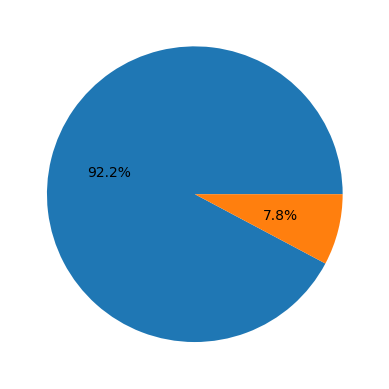

In [ ]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(normalize=True), autopct='%1.1f%%')

* Standardisation des données:

In [ ]:
pipeline = Pipeline([
    ('standardization', StandardScaler()),  
])
pipeline.fit(X_train)
X_train_scaler = pipeline.transform(X_train)

In [ ]:
X_test_scaler = pipeline.transform(X_test)

In [ ]:
custom_scorer = make_scorer(custom_score, greater_is_better=False)
scoring = {
        'AUC': 'roc_auc',
        'business_score': custom_scorer,
        'Accuracy':'accuracy',
        'Precision': 'precision',
        'Recall': 'recall',
        'F1_Score': 'f1',
        'Balanced_Accuracy': 'balanced_accuracy'
      }


### -LogisticRegression:

**1-Manual upsampling within folds:**

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle= True)

In [ ]:
example_params = {
        'solver': 'liblinear',
    'C': 0.1 }
    

def score_model(model, params, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (recall) scores
    """
   
    
    
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTE(random_state=42)
    
    val_scores = []
    train_scores = []
    time_scores = []

    for train_fold_index, val_fold_index in cv.split(X_train_scaler, y_train):
        # Get the training data
        X_train_fold, y_train_fold = X_train_scaler[train_fold_index], y_train.iloc[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train_scaler[val_fold_index], y_train.iloc[val_fold_index]

        # Upsample only the data in the training section
        X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        # Score the model on the (non-upsampled) validation data
        score = roc_auc_score(y_val_fold, model_obj.predict_proba(X_val_fold)[:,1])
        train_score = roc_auc_score(y_train_fold, model_obj.predict_proba(X_train_fold)[:,1])

        val_scores.append(score)
        train_scores.append(train_score)
    return np.array(val_scores), np.array(train_scores)

# Example of the model in action
valid_score,train_score = score_model(LogisticRegression, example_params, cv=kf)

In [ ]:
params_lg = {

     'solver': ['liblinear'],
    'C':[0.01,0.1,0.2] }

In [ ]:

score_tracker = []
for n in params_lg['solver']:
    for m in params_lg['C']:
        example_params = {
            'solver': n,
            'C': m,
            'random_state': 13
        }
        example_params['AUC'] = score_model(LogisticRegression, 
                                               example_params, cv=kf)[0].mean()
        score_tracker.append(example_params)
        
# What's the best model?
sorted(score_tracker, key=lambda x: x['AUC'], reverse=True)[0]

{'solver': 'liblinear',
 'C': 0.2,
 'random_state': 13,
 'AUC': 0.7474351504191279}

In [ ]:
X_train_upsample, y_train_upsample = SMOTE(random_state=42).fit_resample(X_train_scaler, y_train)
y_train_upsample.mean()

0.5

In [ ]:
rl= LogisticRegression(solver='liblinear', C = 0.2, random_state=13)
model_rl = rl.fit(X_train_upsample, y_train_upsample)
roc_auc_score(y_test, model_rl.predict_proba(X_test_scaler)[:,1])

**2-Using imblearn pipeline:**

In [ ]:
imba_pipeline = make_pipeline(SMOTE(),
                              LogisticRegression(random_state=13))
new_params = {'logisticregression__' + key: params_lg[key] for key in params_lg}

In [ ]:
grid_imba = GridSearchCV(imba_pipeline, param_grid= new_params, cv=kf, scoring= scoring,refit='AUC',
                        return_train_score=True)
model_rl = grid_imba.fit(X_train_scaler, y_train)

In [ ]:
grid_imba.best_params_

{'logisticregression__C': 0.2, 'logisticregression__solver': 'liblinear'}

In [ ]:
esemator = grid_imba.best_estimator_

In [ ]:
grid_imba.best_score_

0.7473116328378351

In [ ]:
y_test_pred = grid_imba.predict_proba(X_test_scaler)

In [ ]:
y_test_pred = grid_imba.predict_proba(X_test_scaler)
roc_auc_score(y_test, y_test_pred[:,1])

0.7501596478504976

- * Quelque soit la methode: manuelles ou bien on utilisant les pipeline de imblearn, on trouve les meme scores de prediction,
le suréchantillonnage est trés bien gerer avec c'est deux methodes, avec c'est deux methodes utiliser on a éviter le data leakage(fuite de données)

### - Comparaison entre les modéles:

In [ ]:
def evaluate_models(model,X_train ,y_train, param_grid):
    kf =  KFold(n_splits=5, random_state=42, shuffle= True)
    imb_pipe  = make_pipeline(StandardScaler(),SMOTE(),
                              model(random_state=13))
    
    
    grid_imba = GridSearchCV(imb_pipe, param_grid= param_grid, cv=kf, scoring= scoring,refit='AUC',
                        return_train_score=True)
    grid_imba.fit(X_train, np.ravel(y_train))

    cv_results = grid_imba.cv_results_
    ## Acceder aux score pour chaque métrique dans le dictionnaire de scoring:
    all_scores = {}
    for metric in scoring:
        mean_scores = cv_results['mean_test_' + metric]
        std_scores = cv_results['std_test_' + metric]
        all_scores[metric] = {
            'mean_score':mean_scores,
            'std_score':std_scores
        }
    # meilleurs params:
    best_params = grid_imba.best_params_


    eval_dict = {}
    test_scoring_dict ={}
   
    
    for i in scoring :
        test_scoring_dict[i] = (cv_results["mean_test_" + i][grid_imba.best_index_])
      

    train_time = (cv_results["mean_fit_time"][grid_imba.best_index_])

    eval_dict = {'estimator' : grid_imba.best_estimator_,
                    
                    'best_grid_params' : best_params,
                    'test_scores' : test_scoring_dict, 
                    'train_time' : train_time }

    return eval_dict , cv_results

##### Prediction sur x_test et calcul des scores:

In [ ]:
def calculat_score_for_prediction(estimator, X_test, y_test, scoring):

    y_pred = estimator.predict(X_test)
    y_test_pred = estimator.predict_proba(X_test)
    dict_score = {}
    for score in scoring:
        if score == 'business_score':
            dict_score[score] = custom_score(y_test, y_pred)
        elif score == 'AUC':
            dict_score[score] = roc_auc_score(y_test, y_test_pred[:,1])
        elif score == 'Accuracy':
            dict_score[score] = accuracy_score(y_test, y_test_pred[:,1].round())
        elif score == 'Precision':
            dict_score[score] = precision_score(y_test, y_test_pred[:,1].round())
        elif score == 'Recall':
            dict_score[score] = recall_score(y_test, y_test_pred[:,1].round())
        elif score == 'F1_Score':
            dict_score[score] = f1_score(y_test, y_test_pred[:,1].round())
        elif score =='Balanced_Accuracy':
            dict_score[score] = balanced_accuracy_score(y_test, y_test_pred[:,1].round())
    return dict_score




In [ ]:
def metrics_from_frame(name, validate_score, test_score):

    # prefix test pour cle de dict: 
    test_score = {"test_" + key: value for key, value in test_score.items()}
    # prefix pour validate pour cle de dict:
    val_scores = validate_score['test_scores']
    val_score = {"val_" + key: value for key, value in val_scores.items()}
    time = validate_score['train_time']
    # rassemblage des deux dictionnaire:
    dict_metrics = {**test_score,**val_score}
    
    # transform en dataframe 
    df = pd.DataFrame.from_dict(dict_metrics, orient = 'index')
    df = df.transpose()
    df = df.assign(Models= name,Time=validate_score['train_time'])
    model_col = df.pop(df.columns[-2])
    df.insert(0, model_col.name, model_col)

    return df


### 1-Modèle DummyClassifier():

In [ ]:
param_grid_dc = {
            'dummyclassifier__strategy': ['stratified']}
eval_metric_dc, cv_results = evaluate_models(DummyClassifier,X_train ,y_train, param_grid_dc)

In [ ]:
cv_results

{'mean_fit_time': array([2.24514732]),
 'std_fit_time': array([0.83120552]),
 'mean_score_time': array([0.18102355]),
 'std_score_time': array([0.04718479]),
 'param_dummyclassifier__strategy': masked_array(data=['stratified'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'dummyclassifier__strategy': 'stratified'}],
 'split0_test_AUC': array([0.49283344]),
 'split1_test_AUC': array([0.50559486]),
 'split2_test_AUC': array([0.49965514]),
 'split3_test_AUC': array([0.50481425]),
 'split4_test_AUC': array([0.49460325]),
 'mean_test_AUC': array([0.49950019]),
 'std_test_AUC': array([0.00517366]),
 'rank_test_AUC': array([1]),
 'split0_train_AUC': array([0.50112083]),
 'split1_train_AUC': array([0.5012476]),
 'split2_train_AUC': array([0.49992949]),
 'split3_train_AUC': array([0.49768631]),
 'split4_train_AUC': array([0.50371051]),
 'mean_train_AUC': array([0.50073895]),
 'std_train_AUC': array([0.00196003]),
 'split0_test_business_score': arr

In [ ]:
estimator = eval_metric_dc['estimator']
scor_pred_dc = calculat_score_for_prediction(estimator, X_test, y_test, scoring)

In [ ]:
df_dc =  metrics_from_frame('DummyClassifier', eval_metric_dc, scor_pred_dc )
df_dc

,Models,test_AUC,test_business_score,test_Accuracy,test_Precision,test_Recall,test_F1_Score,test_Balanced_Accuracy,val_AUC,val_business_score,val_Accuracy,val_Precision,val_Recall,val_F1_Score,val_Balanced_Accuracy,Time
0,DummyClassifier,0.495025,63405.0,0.498912,0.076234,0.490425,0.131956,0.495025,0.4995,-29341.6,0.501344,0.077515,0.497311,0.134122,0.4995,2.245147


### 2- Modèle RandomForestClassifier:

In [ ]:
param_grid_rf = {
            'randomforestclassifier__n_estimators': [10,50,100],
            'randomforestclassifier__max_depth':[None, 5, 10, 30] }
eval_metric_rf, dict_rf = evaluate_models(RandomForestClassifier,X_train ,y_train, param_grid_rf)

In [ ]:
estimator = eval_metric_rf['estimator']
rf_pred_test = calculat_score_for_prediction(estimator, X_test, y_test, scoring)

In [ ]:
df_rf =  metrics_from_frame('RandomForestClassifier', eval_metric_rf, rf_pred_test )
df_rf

,Models,test_AUC,test_business_score,test_Accuracy,test_Precision,test_Recall,test_F1_Score,test_Balanced_Accuracy,val_AUC,val_business_score,val_Accuracy,val_Precision,val_Recall,val_F1_Score,val_Balanced_Accuracy,Time
0,RandomForestClassifier,0.716964,55547.0,0.917756,0.297006,0.043175,0.075391,0.517285,0.716484,-25954.6,0.917278,0.283268,0.042605,0.074058,0.51677,288.574107


### 3- LogisticRegression:

In [ ]:
param_grid_lr = {

            'logisticregression__solver': ['liblinear'],
            'logisticregression__C':[0.01,0.1,0.2] }
eval_metric_lr , metric_lr= evaluate_models(LogisticRegression,X_train ,y_train, param_grid_lr)

In [ ]:
eval_metric_lr

{'estimator': Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                 ('logisticregression',
                  LogisticRegression(C=0.2, random_state=13,
                                     solver='liblinear'))]),
 'best_grid_params': {'logisticregression__C': 0.2,
  'logisticregression__solver': 'liblinear'},
 'test_scores': {'AUC': 0.7472410964809975,
  'business_score': 0.9249637775833378,
  'Accuracy': 0.7032819988360135,
  'Precision': 0.15960154560543044,
  'Recall': 0.6610560085295809,
  'F1_Score': 0.25710707203847344,
  'Balanced_Accuracy': 0.6839500275033186},
 'train_time': 71.95175065994263}

In [ ]:
estimator = eval_metric_lr['estimator']
        
dict_score_pred = calculat_score_for_prediction(estimator, X_test, y_test, scoring)


In [ ]:
df_logi =  metrics_from_frame('LogisticRegression', eval_metric_lr, dict_score_pred )
df_logi

,Models,test_AUC,test_business_score,test_Accuracy,test_Precision,test_Recall,test_F1_Score,test_Balanced_Accuracy,val_AUC,val_business_score,val_Accuracy,val_Precision,val_Recall,val_F1_Score,val_Balanced_Accuracy,Time
0,LogisticRegression,0.749977,39297.0,0.703906,0.160274,0.663475,0.25818,0.685393,0.747421,-18381.8,0.704145,0.160095,0.66142,0.257774,0.684585,71.6956


### 4- Gradient Boosting:

In [ ]:
param_grid_gb = {
    "gradientboostingclassifier__learning_rate": [0.01, 0.1],
    #"gradientboostingclassifier__n_estimators": [10, 50, 100],
    "gradientboostingclassifier__max_depth": [5]
}

eval_metric_gb , metrics_gb= evaluate_models(GradientBoostingClassifier,X_train ,y_train, param_grid_gb)

In [ ]:
estimator = eval_metric_gb['estimator']     
test_score_gb = calculat_score_for_prediction(estimator, X_test, y_test, scoring)


In [ ]:
df_gb =  metrics_from_frame('GradientBoostingClassifier', eval_metric_gb, test_score_gb)
df_gb

,Models,test_AUC,test_business_score,test_Accuracy,test_Precision,test_Recall,test_F1_Score,test_Balanced_Accuracy,val_AUC,val_business_score,val_Accuracy,val_Precision,val_Recall,val_F1_Score,val_Balanced_Accuracy,Time
0,GradientBoostingClassifier,0.7448,56369.0,0.921975,0.450185,0.02124,0.040565,0.509528,0.743419,-26250.2,0.922116,0.472123,0.02343,0.04464,0.510613,1581.325586


### 5 - LightGBM:

In [ ]:
param_grid_lgb = {
    
    'lgbmclassifier__learning_rate':[0.017,0.01 , 0.03,1],
    'lgbmclassifier__n_estimators':[1000,15000],
    'lgbmclassifier__num_leaves':[34,38,40],
    #  'lgbmclassifier__colsample_bytree':[0.9497036,0.98845],
    #   'lgbmclassifier__subsample':[0.8715623],
       'lgbmclassifier__max_depth':[5,10],
        # 'lgbmclassifier__reg_alpha':[0.041545473],
        #  'lgbmclassifier__reg_lambda':[0.0735294],
        #   'lgbmclassifier__min_split_gain':[0.0222415],
        #    'lgbmclassifier__min_child_weight':[39.3259775]
    
            }

eval_metric_lgb,dict_lgb = evaluate_models(LGBMClassifier,X_train ,y_train, param_grid_lgb)

In [ ]:
estimator = eval_metric_lgb['estimator']
        
test_score_lgb = calculat_score_for_prediction(estimator, X_test, y_test, scoring)


In [ ]:
df_lgbm =  metrics_from_frame('LGBMClassifier', eval_metric_lgb, test_score_lgb)
df_lgbm

,Models,test_AUC,test_business_score,test_Accuracy,test_Precision,test_Recall,test_F1_Score,test_Balanced_Accuracy,val_AUC,val_business_score,val_Accuracy,val_Precision,val_Recall,val_F1_Score,val_Balanced_Accuracy,Time
0,LGBMClassifier,0.772202,55699.0,0.922394,0.505236,0.0336,0.06301,0.515415,0.770132,-25957.8,0.922296,0.495906,0.035248,0.065808,0.516119,41.468456


In [91]:
data = pd.concat([df_dc,df_rf])
data = pd.concat([data,df_lgbm ])
data = pd.concat([data, df_gb])
data.sort_values("test_AUC", ascending = False)

,Models,test_AUC,test_business_score,test_Accuracy,test_Precision,test_Recall,test_F1_Score,test_Balanced_Accuracy,val_AUC,val_business_score,val_Accuracy,val_Precision,val_Recall,val_F1_Score,val_Balanced_Accuracy,Time
0,LGBMClassifier,0.772202,55699.0,0.922394,0.505236,0.033600,0.063010,0.515415,0.770132,-25957.8,0.922296,0.495906,0.035248,0.065808,0.516119,41.468456
0,GradientBoostingClassifier,0.744800,56369.0,0.921975,0.450185,0.021240,0.040565,0.509528,0.743419,-26250.2,0.922116,0.472123,0.023430,0.044640,0.510613,1581.325586
0,RandomForestClassifier,0.716964,55547.0,0.917756,0.297006,0.043175,0.075391,0.517285,0.716484,-25954.6,0.917278,0.283268,0.042605,0.074058,0.516770,288.574107
0,DummyClassifier,0.495025,63405.0,0.498912,0.076234,0.490425,0.131956,0.495025,0.499500,-29341.6,0.501344,0.077515,0.497311,0.134122,0.499500,2.245147


### Evaluation de modèle avec mlflow:

In [77]:
def log_mlflow(model, run_name, results_, name):
    
    mlflow.set_experiment(name)
    mlflow.sklearn.autolog() 
    for i, params in enumerate(results_['params']):
        with mlflow.start_run(run_name=f"run_name{i + 1}",nested=True):
            for key, value in params.items():
                mlflow.log_param(key, value)
                #log model:
                #mlflow.sklearn.log_model(model(params), "Classification_run")
            list_col = [col for col in results_ if col.startswith("mean_test_")]
            for col in list_col:
                for i in dict_lgb[col]:
                    mlflow.log_metric(col,i) 
            for time in results_['mean_score_time']:
                mlflow.log_metric('mean_score_time',time) 
        
        
        # # Enregister les figures
        # mlflow.log_artifact('confusion_matrix.png', artifact_path='images')
        # mlflow.log_artifact('AUC_ROC.png',artifact_path='images' )
        # Enregistrer le modèle
       

    mlflow.end_run()





**1- mlflow_lgbmclassifier:**

In [75]:
log_mlflow(LGBMClassifier, 'lgbm',dict_lgb, 'LGBMClassifier' )

**2- mlflow_Gradientboostingclassifier:**

In [78]:
log_mlflow(GradientBoostingClassifier, 'g_boosting',metrics_gb, 'GradientBoostingClassifier' )

**3- mlflow_RandomForestclassifier:**

In [76]:
log_mlflow(RandomForestClassifier, 'RandomForest',dict_rf, 'RandomForestClassifier' )

**4- mlflow_Dummyclassifier:**

In [79]:
log_mlflow(DummyClassifier, 'Dummyclassifier',cv_results, 'Dummyclassifier' )

### Best models with MLflow:

In [83]:
# def log_mlflow(model, run_name, params, score_metrics):
#     mlflow.set_experiment(run_name)
#     mlflow.sklearn.autolog() 
    
#     with mlflow.start_run(run_name=run_name):
       
#         mlflow.log_params(params)

      
#         for index, value in score_metrics.items():
#             mlflow.log_metric(f'test_{index}', value)



#     mlflow.end_run()

def log_mlflow(model, run_name, params, score_metrics):
    
    y_predict = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

  
  
    plt.figure(figsize =(8,5))
    fpr, tpr, thresholds = roc_curve(y_test,y_proba)
    auc = roc_auc_score(y_test,y_proba)
    plt.plot(fpr,tpr,label = f'AUC Roc Curve with Area Under the curve = {auc}')
    plt.legend()
    plt.savefig('./img/AUC_ROC.png')



    mlflow.set_experiment(run_name)
    mlflow.sklearn.autolog() 
    
    with mlflow.start_run(run_name=run_name):
       
        mlflow.log_params(params)

      
        for index, value in score_metrics.items():
            mlflow.log_metric(f'test_{index}', value)

        
        mlflow.sklearn.log_model(model, "Classification_run")
        mlflow.log_artifact('./img/AUC_ROC.png', "AUC ROC curve")

       


    mlflow.end_run()



#### mlflow_dummyclassifier:

2023/11/30 15:52:36 INFO mlflow.tracking.fluent: Experiment with name 'best_model_dummyclassifier' does not exist. Creating a new experiment.


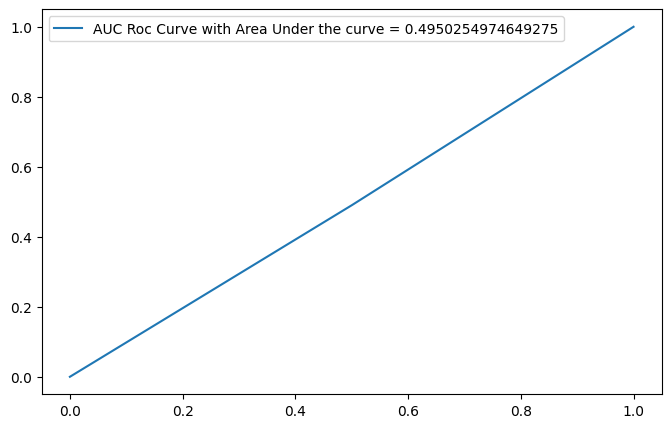

In [89]:
model = eval_metric_dc['estimator']
params = eval_metric_dc['best_grid_params']
score_metrics = scor_pred_dc
log_mlflow(model, 'best_model_dummyclassifier',params,score_metrics)

#### Best model Randomforest with mlflow:

2023/11/30 15:52:27 INFO mlflow.tracking.fluent: Experiment with name 'best_model_Randomforestclassifier' does not exist. Creating a new experiment.


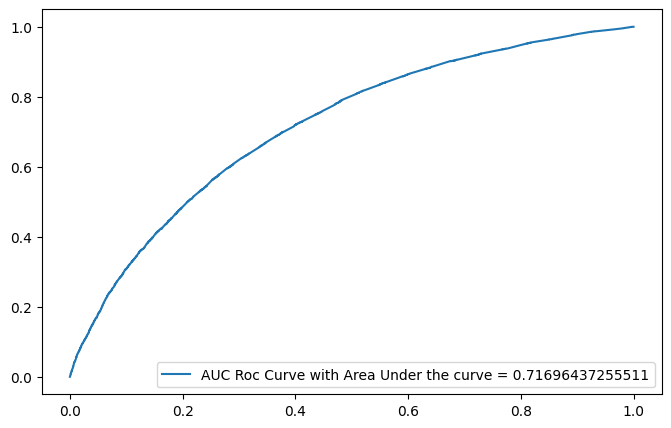

In [88]:
model = eval_metric_rf['estimator']
params = eval_metric_rf['best_grid_params']
score_metrics = rf_pred_test

log_mlflow(model, 'best_model_Randomforestclassifier',params,score_metrics)

### Best model gradienboosting:

2023/11/30 15:52:11 INFO mlflow.tracking.fluent: Experiment with name 'best_model_gradientbosting' does not exist. Creating a new experiment.


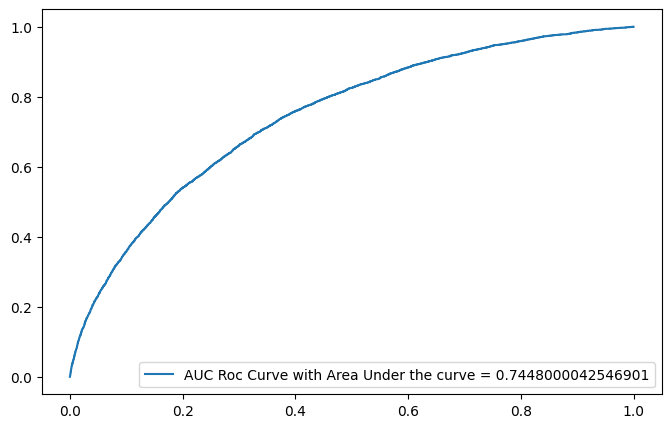

In [87]:
model = eval_metric_gb['estimator']
params = eval_metric_gb['best_grid_params']
score_metrics = scor_pred_dc

log_mlflow(model, 'best_model_gradientbosting',params,score_metrics)

####  Best model LGBMlassifier:

2023/11/30 15:52:03 INFO mlflow.tracking.fluent: Experiment with name 'best_model_LGBMClassifier' does not exist. Creating a new experiment.


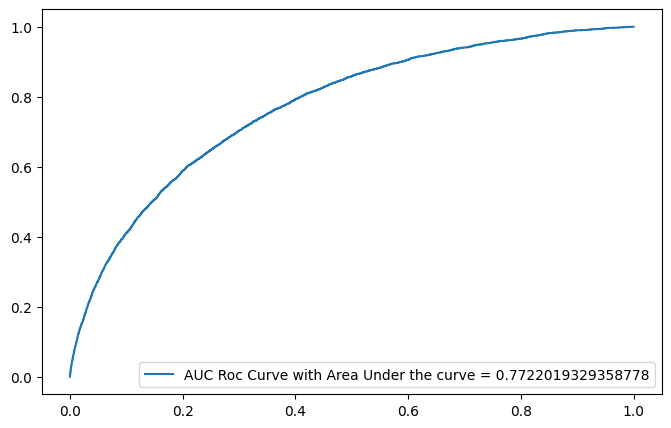

In [86]:
model = eval_metric_lgb['estimator']
params = eval_metric_lgb['best_grid_params']
score_metrics =test_score_lgb

log_mlflow(model, 'best_model_LGBMClassifier',params,score_metrics)

In [ ]:
!mlflow ui

### Roc_auc de comparaison entre les modèles:

In [92]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr,_ = roc_curve(y_test, ns_probs)

### LGBMClassifier:
y_proba = eval_metric_lgb['estimator'].predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_proba)
auc = roc_auc_score(y_test,y_proba)

### Randomforestclassifier:
rf_probs = eval_metric_rf['estimator'].predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

###dummyclassifier

dc_probs = eval_metric_dc['estimator'].predict_proba(X_test)[:,1]
dc_auc =roc_auc_score(y_test, dc_probs)
dc_fpr, dc_tpr, _ = roc_curve(y_test, dc_probs)



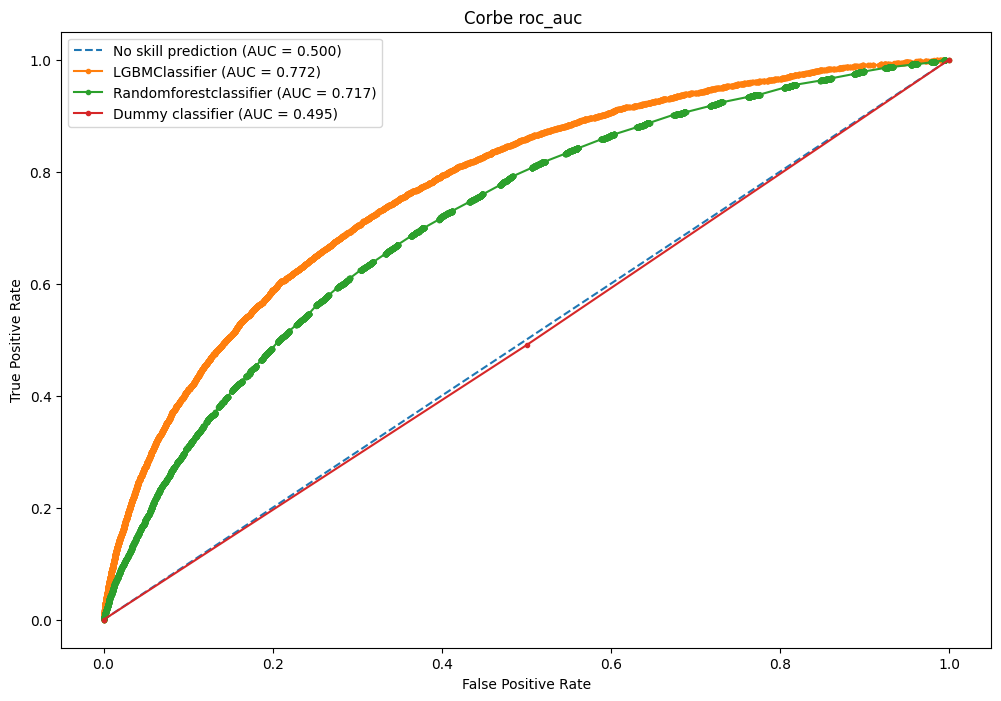

In [93]:
### comparaison entre les score auc:
plt.figure(figsize=(12, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill prediction (AUC = %0.3f)' % ns_auc)
plt.plot(fpr, tpr, marker='.', label='LGBMClassifier (AUC = %0.3f)' % auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Randomforestclassifier (AUC = %0.3f)' % rf_auc)
plt.plot(dc_fpr, dc_tpr, marker='.', label='Dummy classifier (AUC = %0.3f)' % dc_auc)

plt.title('Corbe roc_auc ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

### Pipeline de réference:

In [48]:
model_lgbm = eval_metric_lgb['estimator'][2]
model_lgbm

LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.03, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=1000, nthread=4, num_leaves=34, random_state=13,
               reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

In [40]:
model = model_lgbm.fit(X_train_scaler,np.ravel(y_train))
model_filename = './models/LGBMClassifier.model'
# Enregistrez le modèle
joblib.dump(model, model_filename)

[LightGBM] [Info] Number of positive: 13404, number of negative: 159174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9457
[LightGBM] [Info] Number of data points in the train set: 172578, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077669 -> initscore=-2.474445
[LightGBM] [Info] Start training from score -2.474445


### Interpretabilité locale et globale:

In [48]:
explainer = shap.TreeExplainer(model)


In [50]:
shap_values = explainer.shap_values(X_test_scaler)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


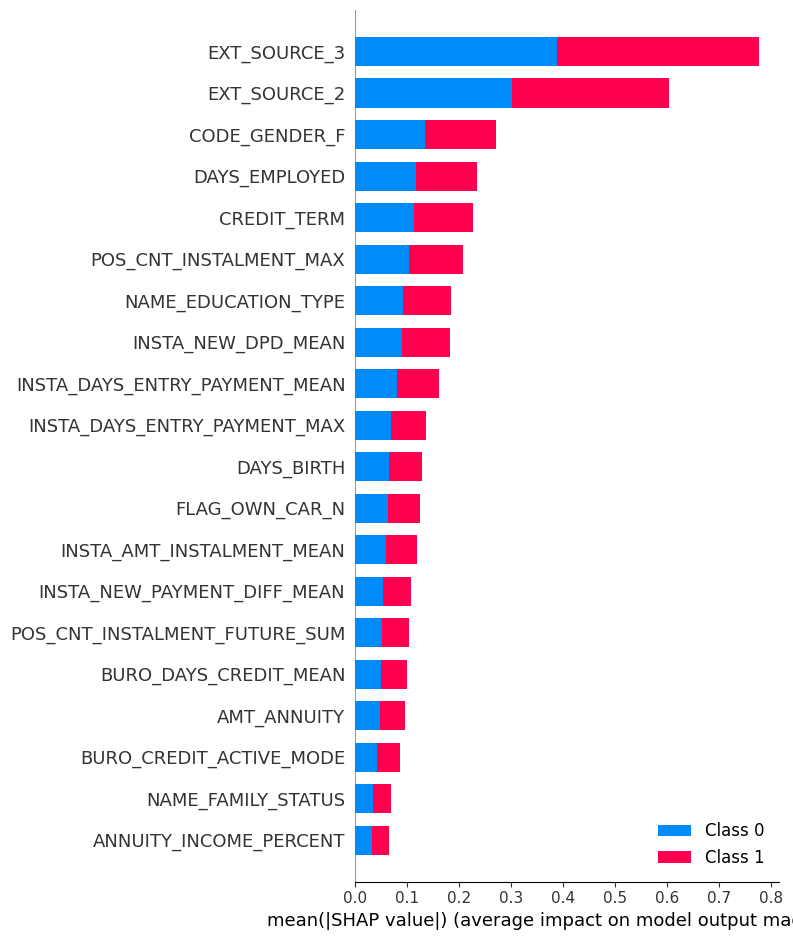

In [51]:
shap.summary_plot(shap_values, X_test)

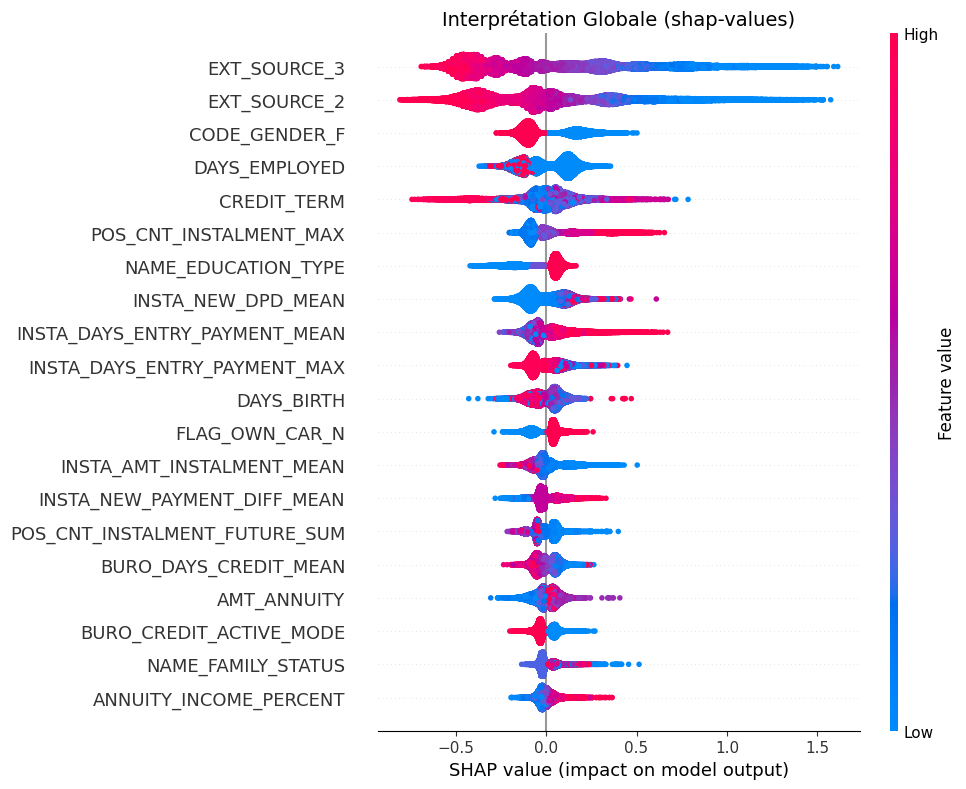

In [52]:
shap.initjs()
shap.summary_plot(shap_values[1],
                  features = X_test,
                  feature_names = X_test.columns,
                  plot_size = (10,8),
                  show = False

                  )
plt.title("Interprétation Globale (shap-values)",fontsize = 14)
plt.tight_layout()
plt.show()


### Interpretation locale :

In [53]:
shap.initjs()  
instance_idx = 0
shap.force_plot(explainer.expected_value[1],shap_values[1][instance_idx,:], X_test.iloc[instance_idx, :])

### Enregistrement des modèles:

In [54]:
### enregistement du model explainer:
joblib.dump(explainer, './models/explainer.model')

['./models/explainer.model']

In [41]:
### Enregistement du modèle LGBMCassifier:
model_filename = './models/LGBMClassifier.model'
# Enregistrez le modèle
joblib.dump(model, model_filename)

['./models/LGBMClassifier.model']

In [56]:
### enregestrement de scaler:
scaler_filename = './models/scaler.model'
# Enregistrez le modèle
joblib.dump(pipeline, scaler_filename)

['./models/scaler.model']

- git init (initialiser)
- git config --global user.name ""
- git config --global user.email ""
- git add
- git status
- git commit -m ''
- 
